# Analysis of no shows in Medical Appointments

The data is sourced from https://www.kaggle.com/

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv("G:\Data science\Datasets\medical appointment.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#getting the shape of dataset
df.shape

(110527, 14)

In [4]:
#general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Statistical characteristics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.describe(include='object')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [7]:
#Droping irrelevant columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#Modifying column names
df.columns=df.columns.str.lower().str.replace('-','')
df.rename(columns={'hipertension':'hypertension'},inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'noshow'],
      dtype='object')

In [9]:
#Modifying dates to data type
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [10]:
#turning no show column to show
df.noshow=df.noshow.map({'No':1,'Yes':0})
df.rename(columns={'noshow':'show'},inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [11]:
#new column for difference between scheduling and appointment date
day_difference=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days
df.insert(3,'day_diff',day_difference)
df.day_diff.dtype

dtype('int64')

In [12]:
#statistic about cleaned data
df.describe()

,day_diff,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [13]:
#percentage of no-show
df['show'].value_counts()

1    88208
0    22319
Name: show, dtype: int64

,show
1,0.798067
0,0.201933


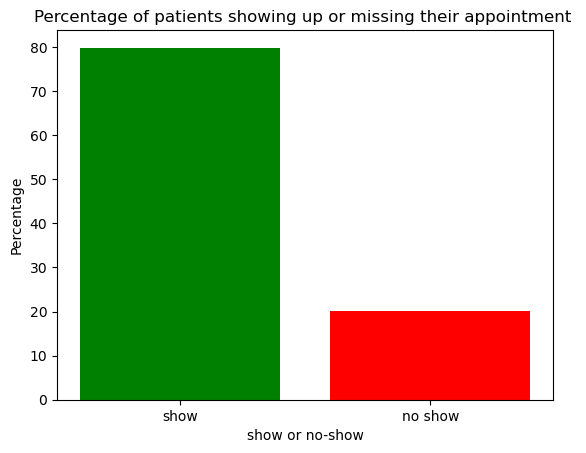

In [47]:
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
pd.DataFrame(df['show'].value_counts(normalize=True))

20% of the patients didnt show up for their appointment.

In [38]:
#gender relation
df[df.show==0]['gender'].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

,gender
F,0.653882
M,0.346118


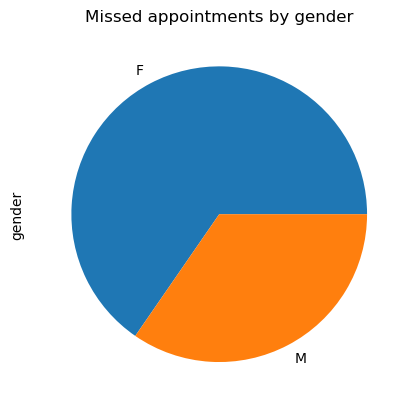

In [41]:
miss=df[df.show==0]['gender'].value_counts(normalize=True)
miss.plot(kind='pie');
plt.title("Missed appointments by gender")
pd.DataFrame(miss)

The percentage of Females missing their appointment is nearly two times the number of males. So Females are most likely to miss their appointment than Males.

In [17]:
#gender split of missing 20%
total=len(df)
total_miss=miss*100/total
pd.DataFrame(total_miss)


,gender
F,13.204013
M,6.989242


In [50]:
#relationship with scholarship
pd.DataFrame(df.groupby('scholarship')['show'].mean())

,show
scholarship,
0,0.801928
1,0.762637


It seems that patients with scholarships are actually more likely to miss their appointment.

In [56]:
#relationship with hypertension
pd.DataFrame(df.groupby('hypertension')['show'].mean())

,show
hypertension,
0,0.790963
1,0.826980


It seems that patients with hypertension are actually more likely to show up for their appointment.

In [52]:
#relationship with receiving SMS
pd.DataFrame(df.groupby('sms_received')['show'].mean())

,show
sms_received,
0,0.832967
1,0.724255


A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !

In [37]:
#relation betweem time difference of scheduling and appointment date
df1=df[df.day_diff>=0]
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)
noshow_day_diff=df[df.show == 0].day_diff2.value_counts()/len(df[df.show == 0])*100
pd.DataFrame(noshow_day_diff)

,day_diff2
more_than_15,38.460505
more_than_4,32.922622
fewdays,20.565438
sameday,8.029034


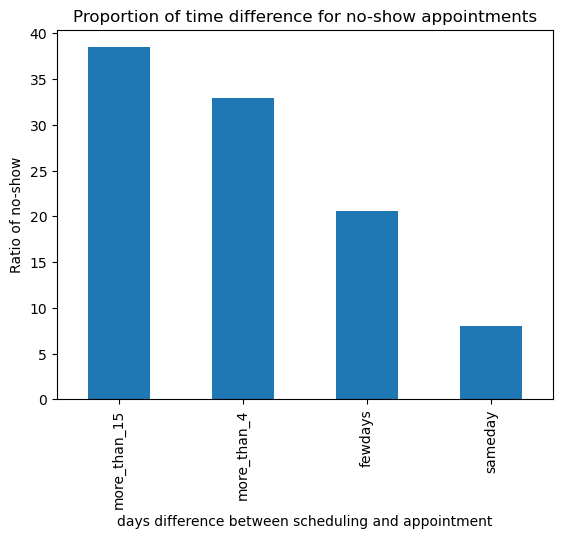

In [64]:
noshow_day_diff.plot(kind='bar');
plt.title('Proportion of time difference for no-show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no-show');

It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.

,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


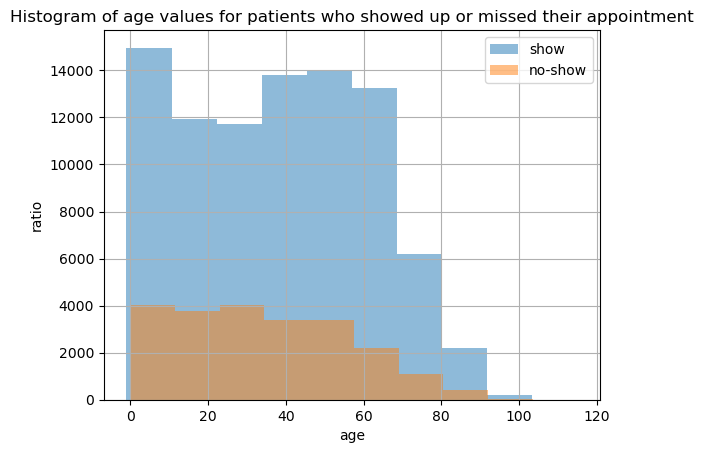

In [60]:
#relation between age
df[df.show==1].age.hist(alpha=0.5,label='show')
df[df.show==0].age.hist(alpha=0.5,label='no-show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
df[df.show==0][['age']].describe()

It appears that younger the patient is, more likely they are to miss their appointments.

In [62]:
#relationship with neighborhood
neigh=df['neighbourhood'].value_counts()
neigh_noshow=df[df.show==0].neighbourhood.value_counts()
percentage=neigh_noshow/neigh
pd.DataFrame(percentage.sort_values(axis=0, ascending=False))

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
...,...
SOLON BORGES,0.147122
MÁRIO CYPRESTE,0.145553
AEROPORTO,0.125000
ILHA DO BOI,0.085714


There is no clear relation between the neighborhood and whether the patient shows up or not.

## Key Findings

    1.Percentage of patients who didn't show up for their appointment is 20.19%.
    2.The percentage of females missing their appointment is nearly two 
    times the number of males. So females are more likely to miss their 
    appointment.
    3.It appears that the longer the period between the scheduling and 
    appointment the more likely the patient won't show up.
    4.It seems that patients with scholarships are actually more likely 
    to miss their appointment.
    5.A strange finding here suggests that patients who received an SMS 
    are more likely to miss their appointment !
    6.Younger patients are more likely to miss their appointments.